<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessing_TA/blob/main/recitations/Recitation_03_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

## 3. היסטוגרמה

<dir>

In [2]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [3]:
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing_TA/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Ariela's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

<div dir="rtl">

## 3.1 יצירת היסטוגרמה והיסטוגרמה מצטברת CDF:

<dir>

In [ ]:
def histograms(img:np.array) -> (np.array, np.array):
    hist = np.zeros(256, dtype='int16')
    nrows, ncols = img.shape
    for r in range(nrows):
        for c in range(ncols):
            hist[img[r, c]] += 1

    acc_hist = np.zeros(256, dtype='int32')
    acc_hist[0] = hist[0]
    for i in range(1,256):
        acc_hist[i] = acc_hist[i-1] + hist[i]
    return hist, acc_hist / img.size

<div dir="rtl">

שימו לב: ההיסטוגרמה המצטברת מנורמלת

<dir>

In [ ]:
img = read_file(fname='house.tiff')

In [ ]:
def plot_img_hist(img:np.array):
    hist, acc_hist = histograms(img)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
    axes[0].imshow(img,  cmap='gray', vmin=0, vmax=255)          #img

    axes[1].set_xlim([0, 256])                                   #histogram
    axes[1].set_ylim([0, hist[1:-1].max()])
    axes[1].bar(np.arange(len(hist)),height=hist);
    axes[2].set_xlim([0, 256])                                   #accumulated histogram
    axes[2].bar(np.arange(len(acc_hist)),height=acc_hist);

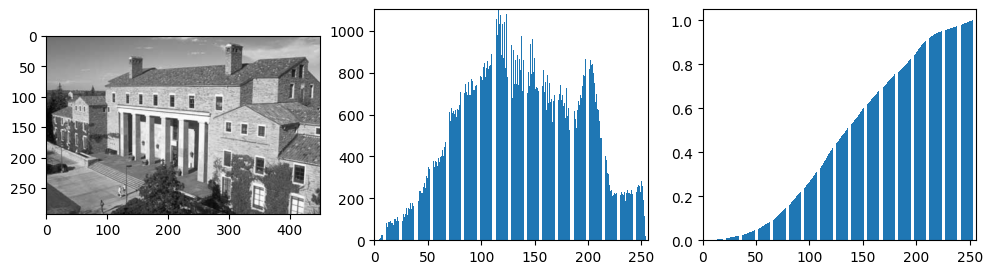

In [ ]:
plot_img_hist(img)

<div dir="rtl">

**יצירת היסטוגרמה באמצעות פונקציות מובנות**

<dir>

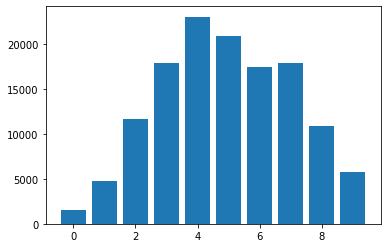

In [ ]:
hist, _ = np.histogram(img, bins=10)       #by matplotlib.pyplot as plt
plt.bar(np.arange(len(hist)),height=hist);

<div dir="rtl">

## 3.2 הזזה היסטוגרמה - הגדלת / הקטנת בהירות

<dir>

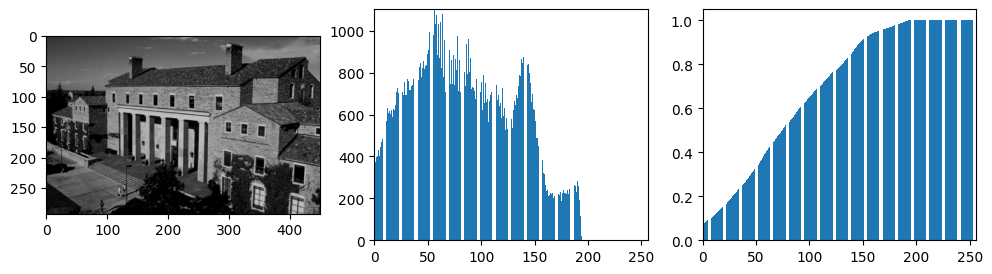

In [ ]:
dark_img = np.clip(img - 60, a_min=0, a_max=255) #np.clip for overflow / underflow
plot_img_hist(dark_img)

<div dir="rtl">

## 3.3 כיווץ\מתיחה של ההיסטוגרמה

<dir>

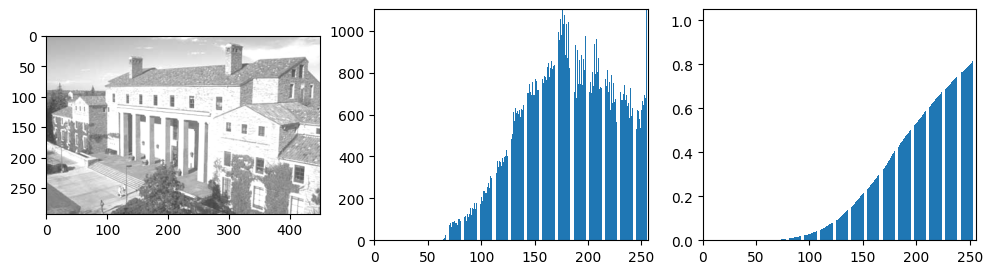

In [ ]:
bright_img = np.clip(img + 60, a_min=0, a_max=255) #np.clip for overflow / underflow
plot_img_hist(bright_img)

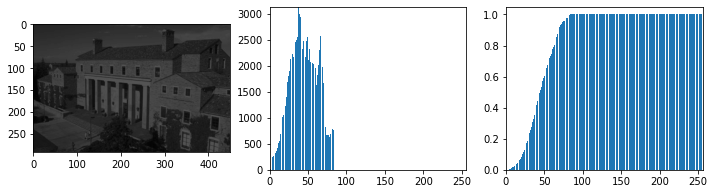

In [ ]:
img1 = (img / 3).astype(np.int16) #division by 3
bright_img = np.clip(img1, a_min=0, a_max=255)
plot_img_hist(img1)

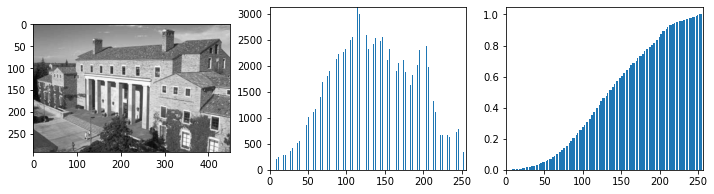

In [ ]:
img2 = (img1 * 3).astype(np.int16)
img2 = np.clip(img2, a_min=0, a_max=255)
plot_img_hist(img2)

<div dir="rtl">

מאחר וחילקנו תחילה את ההיסטוגרמה וצמצנו את הטווח ל[0,88] ואז הכפלנו חזרה לטווח, ההיסטוגרמה תכיל עכשיו רק ערכים שהם כפולות של 3 ולכן נאבד מידע.

<dir>

<div dir="rtl">

## 3.4 מתיחת היסטוגרמה (קנה מידה ליניארי) -  הגדלת ניגודיות

<dir>

$$G_{i,j}=\frac{F_{i,j}-F_{min}}{F_{max}-F_{min}}$$

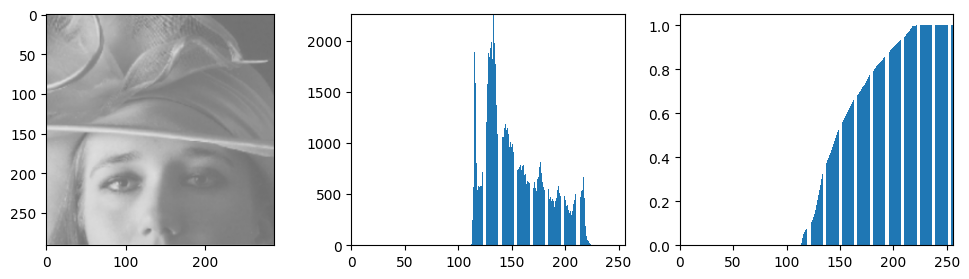

In [ ]:
img = read_file(fname='lena1.tiff')[:, :, 0]
plot_img_hist(img)

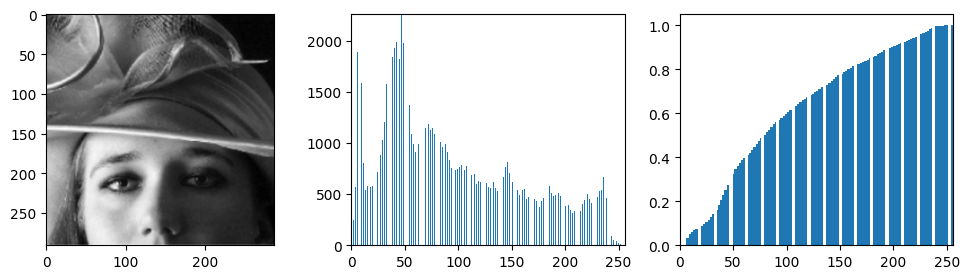

In [ ]:
img1 = (img - img.min()) / (img.max() - img.min()) * 255
img1 = img1.astype(np.int16)
plot_img_hist(img1)

<div dir="rtl">

מה יקרה אם תחילה נשנה שני פיקסלים לערכי קיצון ואז ננרמל?

<dir>

In [ ]:
img = (img / 3 + 80).astype(np.int16)
img[0, 0] = 0
img[0,1] = 255

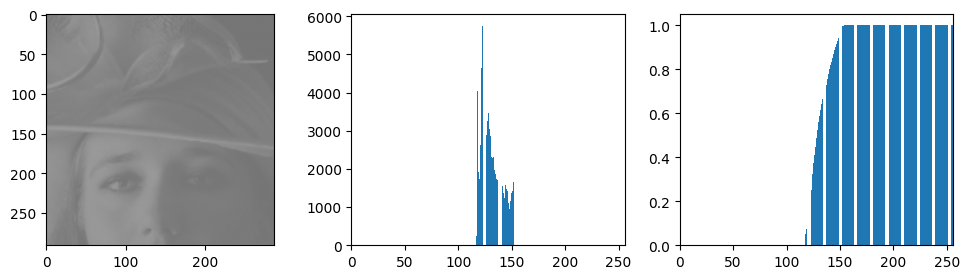

In [ ]:
p_low, p_high = np.percentile(img, [2, 98])
img1 = (img - img.min()) / (img.max() - img.min()) * 255
img1 = img1.astype(np.int16)
plot_img_hist(img1)

<div dir="rtl">

## 3.5 השוואת היסטוגרמה

<dir>



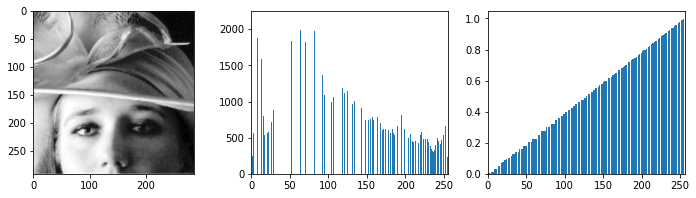

In [ ]:
import cv2 as cv

img_equ = cv.equalizeHist(img1.astype(np.uint8))
plot_img_hist(img_equ)

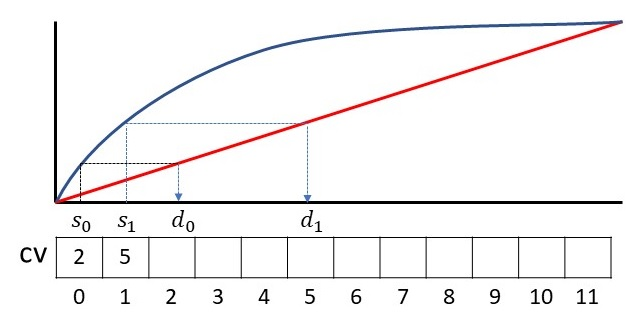

<div dir="rtl">

לפי עקומת המקור, האם תמונת המקור בהירה או כהה?

<dir>




<div dir="rtl">

מה המשמעות של הקו האופקי $|s_1,d_1|$?

<dir>

In [ ]:
idx_src = 0
idx_dest = 0
acc_hist_src = np.array([0.2, 0.35, 0.45, 0.47, 0.5, 0.6, 0.65, 0.7, 0.8, 1.0])
acc_hist_dest = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
NUM_COLOR = 10   # 256

# create a conversion vector to hold the new grayscale transformation
cv = np.zeros(NUM_COLOR, dtype=np.uint16)
while idx_src < NUM_COLOR:
    if acc_hist_dest[idx_dest] < acc_hist_src[idx_src]:
        idx_dest = idx_dest + 1
    else:
        cv[idx_src] = idx_dest
        idx_src = idx_src + 1

print([f'{i}->{cv[i]}' for i in range(len(cv))])

['0->1', '1->3', '2->4', '3->4', '4->4', '5->5', '6->6', '7->6', '8->7', '9->9']


<div dir="rtl">

## 3.6 תרגיל 1

<dir>


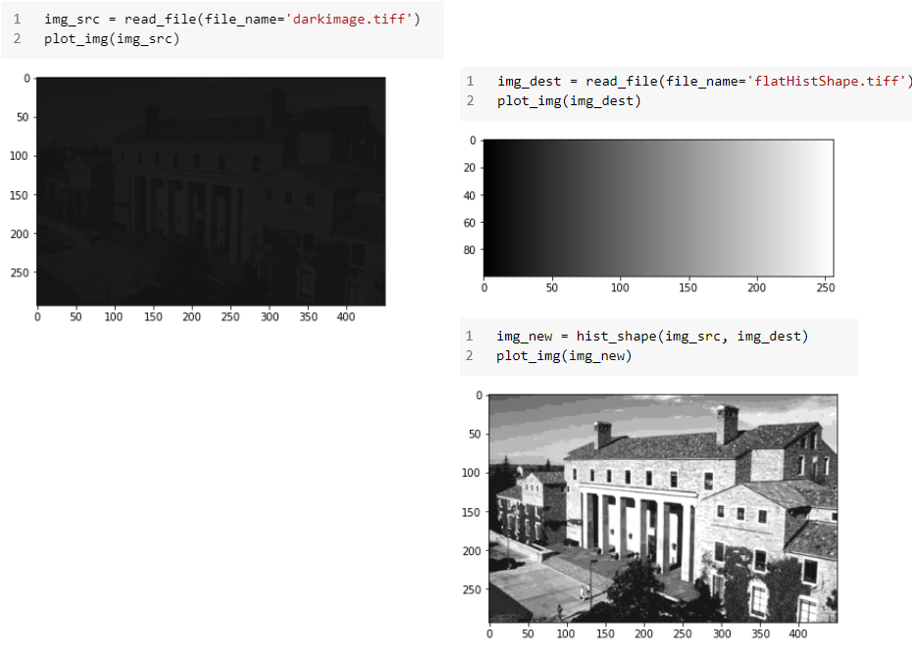


**```img_new = hist_shape(img_src, img_dest)```**
```
1. define a function which get as input an image and returns a 256 array with normalized accumulated histogram (see 3.1 above)
2. using [1], generate normalized accumulated histograms for img_src and img dest
3. apply the hstogram equalization (see 3.4 above + 256 colors instead of 10...). The result is vector cv with lenght of 256 elements.
4. created an empty (with zeros) img_new with size same as img_src.
5. loop on all pixels. For each pixel img_new[r,c] = cv[img_src[r,c]]
```

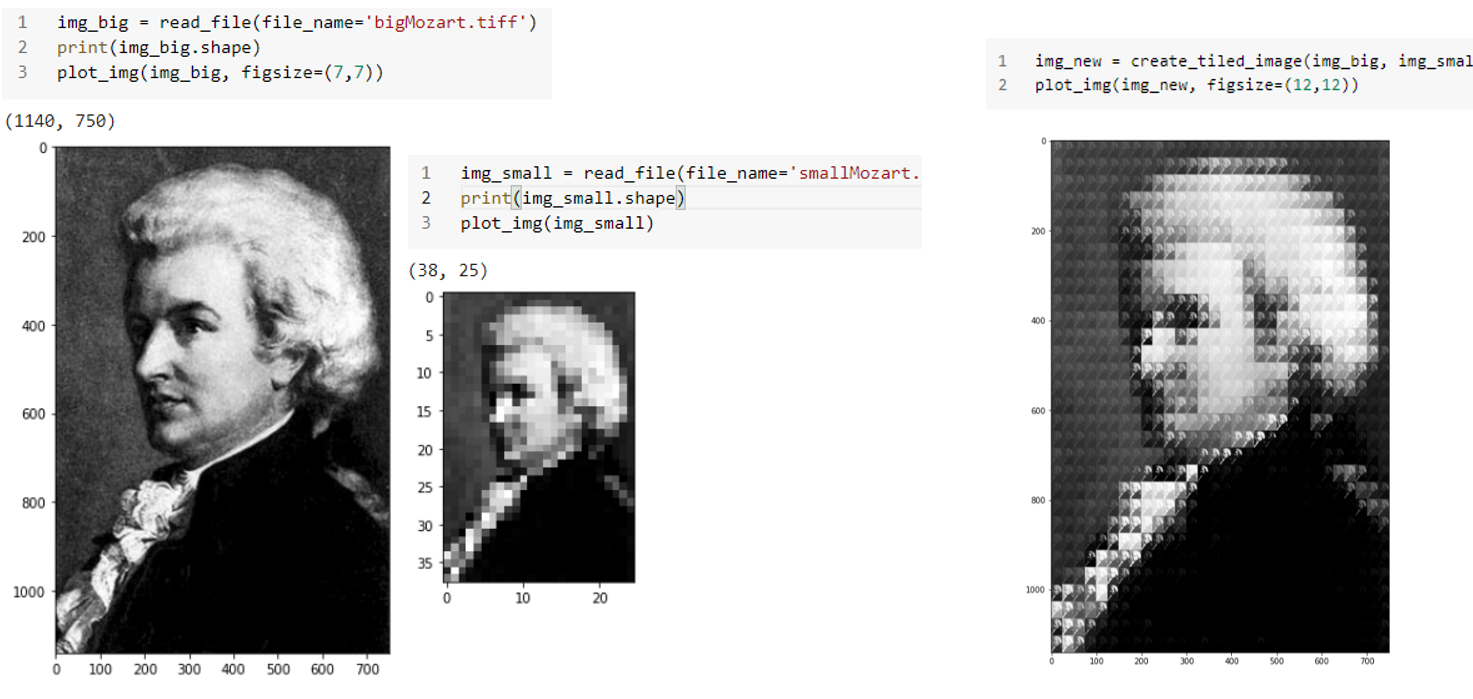

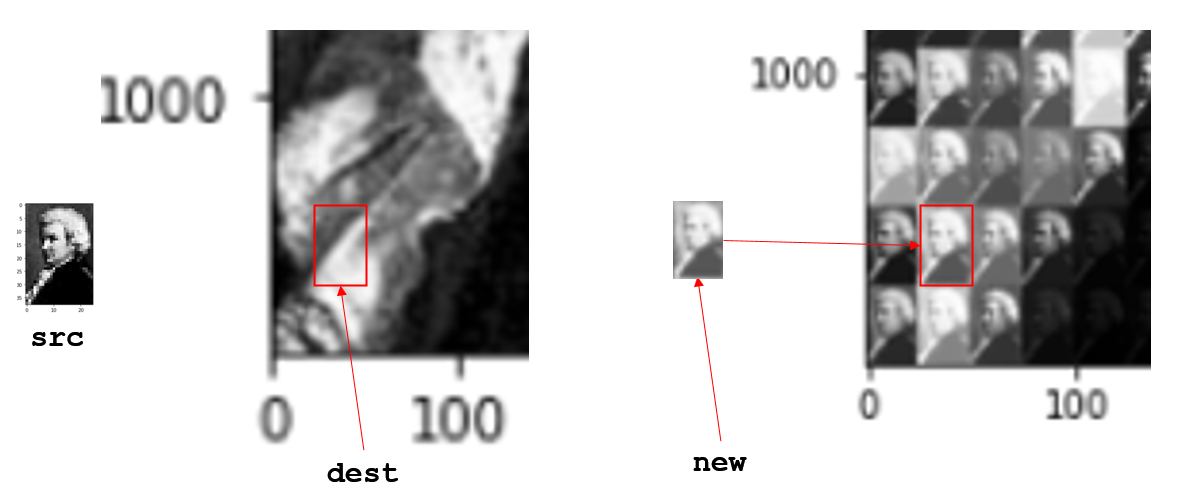